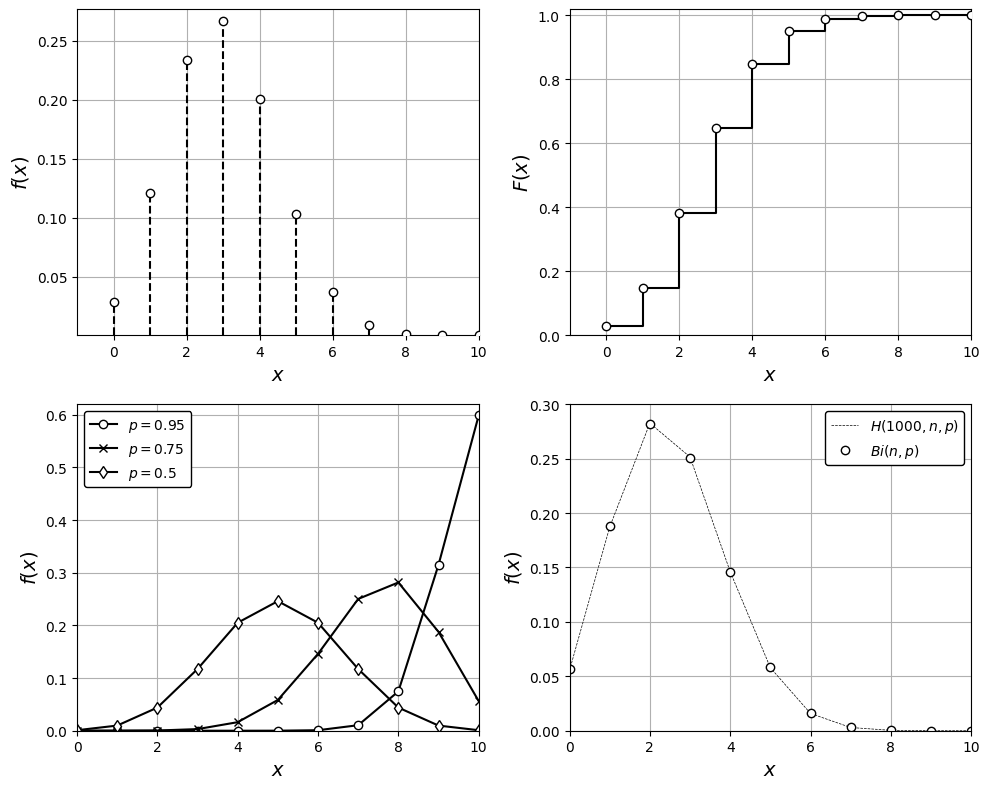

In [1]:
# Victor Z and J E Umaña
# UW-Madison, 2024
# pdf and cdf of a binomial RV

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, hypergeom

# Clear previous plots
plt.close('all')

# Parameters
n = 10
p = 0.3
x = np.arange(0, n+1)

# PDF and CDF using built-in functions
f = binom.pmf(x, n, p)
F = binom.cdf(x, n, p)

# Create figure
plt.figure(figsize=(10,8))

# Visualize PDF and CDF
plt.subplot(221)
for j in range(len(x)):
    plt.plot(np.full(100, x[j]), np.linspace(0, f[j], 100), 'k--', zorder=2)
plt.scatter(x, f, marker='o', facecolors='w', edgecolors='black', zorder=3)
plt.grid(True, zorder=1)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axis([min(x)-1, 10, min(f), max(f)+0.01])

plt.subplot(222)
plt.step(x, F, where='post', color='black', zorder=2)
for j in range(len(x)):
    plt.scatter(x[j], F[j], marker='o', facecolors='w', edgecolors='black', zorder=3)
plt.grid(True, zorder=1)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)
plt.axis([min(x)-1, 10, -0.0, 1.02])

# Compare for different p
p_values = [0.95, 0.75, 0.5]
colors = ["black", "black", "black"]
markers = ["o-", "x-", "d-"]

plt.subplot(223)
for k in range(len(p_values)):
    plt.plot(x, binom.pmf(x, n, p_values[k]), markers[k], markerfacecolor='w', markeredgecolor=colors[k], color=colors[k])
plt.grid(True)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axis([0, 10, 0, 0.62])
plt.legend([f'$p={p_val}$' for p_val in p_values], loc='upper left', fontsize=10, framealpha=1, edgecolor='k')

# Demonstrate that hypergeometric converges to binomial
plt.subplot(224)
p = 0.25
N_values = [1000]
for N in N_values:
    Ny = round(p * N)
    xs = np.arange(max(n + Ny - N, 0), min(n, Ny) + 1)
    plt.plot(xs, hypergeom.pmf(xs, N, Ny, n), 'k--', linewidth=0.5)
plt.plot(x, binom.pmf(x, n, p), 'ko', markerfacecolor='w', markeredgecolor='black', linewidth=1.5)
plt.grid(True)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axis([0, 10, 0, 0.3])
plt.legend(['$H(1000, n, p)$', '$Bi(n, p)$'], loc='upper right', fontsize=10, framealpha=1, edgecolor='k')

plt.tight_layout()
plt.show()